## Should You Actually Stay in Philly for Spring Break?

Every March, we, the students of UPenn, face the same question: **do we escape Philly for Spring Break, or just stick it out?** Flights are expensive, beaches are crowded, and sometimes it’s actually not that bad at home. 

But is that really? Is it not too bad or are we just lying to ourselves? Theres one way to know!

To find out, I looked at **21 years of weather data (2005–2025)** from Philadelphia and asked a simple question:

**What is Spring Break generally like here?** 

WILL IT BE? 

![Gorgeous Spring](spring.jpg)


OR ALTERNATIVELY STILL?  

![Painfully cold](winter.jpg)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("philadelphia_weather_2005_to_2025.csv")
df["date"] = pd.to_datetime(df["date"])
df.head()

,day,year,high,low,rain,snow,date,day_num,month_num,dow,dow_name,month
0,January 1,2005,64,39,0.00,0.0,2005-01-01,1,1,5,Saturday,January
1,January 2,2005,47,33,0.01,0.0,2005-01-02,2,1,6,Sunday,January
2,January 3,2005,57,40,0.06,0.0,2005-01-03,3,1,0,Monday,January
3,January 4,2005,55,44,0.00,0.0,2005-01-04,4,1,1,Tuesday,January
4,January 5,2005,47,36,0.62,0.0,2005-01-05,5,1,2,Wednesday,January


In [2]:
df.shape

(7670, 12)

Thats 7665 days! We've got a lot of data to work with and learn from but what exactly are we looking for?

**Spring Break!**

So let's look at 7-15th March for these past years.

In [3]:
spring_break = df[(df["month"] == 'March') & (df["day_num"] >= 7) & (df["day_num"] <= 15)]
spring_break.head(100)

,day,year,high,low,rain,snow,date,day_num,month_num,dow,dow_name,month
65,March 7,2005,69,34,0.00,0.0,2005-03-07,7,3,0,Monday,March
66,March 8,2005,54,21,0.24,0.5,2005-03-08,8,3,1,Tuesday,March
67,March 9,2005,33,18,0.00,0.0,2005-03-09,9,3,2,Wednesday,March
68,March 10,2005,35,22,0.00,0.0,2005-03-10,10,3,3,Thursday,March
69,March 11,2005,51,30,0.05,0.0,2005-03-11,11,3,4,Friday,March
...,...,...,...,...,...,...,...,...,...,...,...,...
3722,March 12,2015,52,37,0.00,0.0,2015-03-12,12,3,3,Thursday,March
3723,March 13,2015,49,30,0.08,0.0,2015-03-13,13,3,4,Friday,March
3724,March 14,2015,51,38,0.95,0.0,2015-03-14,14,3,5,Saturday,March
3725,March 15,2015,48,40,0.00,0.0,2015-03-15,15,3,6,Sunday,March


Perfect! We've now only filtered for our desired dates from the entire dataset. This makes finding patterns we actually care about much easier. Lets see how that has changed our data

In [4]:
spring_break.shape

(189, 12)

In the past 21 years, we have 189 days of weather to inform us about what this year is going to look like. Lets quickly answer some questions.

1. What is the coldest it has been and when?
2. What is the warmest it has been and when? 
3. How often has it rained? and How much?
4. How often has it snowed? and How much?


In [5]:
coldest_day = spring_break.loc[spring_break["low"].idxmin(),'date']
warmest_day = spring_break.loc[spring_break["high"].idxmax(),'date']
rainy_days = spring_break[spring_break["rain"] > 0].shape[0]
amount_of_rain = spring_break['rain'].sum()
amount_of_snow = spring_break['snow'].sum()

print(f'The coldest day in the past springs was {coldest_day}')
print(f'The warmest day in the past springs was {warmest_day}')
print(f'It has rained {rainy_days} in past spring breaks for a total of {amount_of_rain} inches')
print(f'It has snowed for a total of {amount_of_snow} inches')


The coldest day in the past springs was 2015-03-07 00:00:00
The warmest day in the past springs was 2016-03-09 00:00:00
It has rained 53 in past spring breaks for a total of 19.91 inches
It has snowed for a total of 15.8 inches


1. What is the coldest it has been and when? 9th March, 2005 30 degrees 
2. What is the warmest it has been and when? 10th March, 2005 68 degrees
3. How often has it rained? and How much? It has never rained, how crazy is that!
4. How often has it snowed? and How much? Never snowed

Lets now figure out how warm/cold it might be nonetheless on average!

In [6]:
high_average = spring_break['high'].sum()/189
low_average = spring_break['low'].sum()/189
print(high_average, low_average)

55.03703703703704 36.01587301587302


**Temperature highs** average 59.33 degrees 

**Temperature lows** average 37.44 degrees 

Thats a big range!

Its also worthwhile to understand how temperatures are progress over the years instead of treating it as a 20 year block. Oftentimes, due to phenomena like global warming, temperatures increase over time. Let's see if thats the case for Philadelphia over the past few years. 

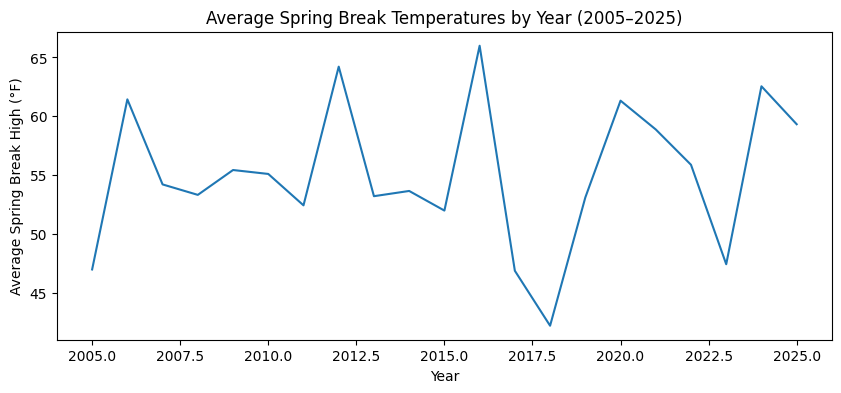

In [7]:
yearly_avg = spring_break.groupby("year")["high"].mean()


plt.figure(figsize=(10,4))
plt.plot(yearly_avg.index, yearly_avg.values)
plt.xlabel("Year")
plt.ylabel("Average Spring Break High (°F)")
plt.title("Average Spring Break Temperatures by Year (2005–2025)")
plt.show()


Evidently, temperatures during the spring break in Philly have almost not moved which seems slightly crazy but the data is clear. This seems unhelpful but rather tells us that we are likely to see a pattern repeat this year, where the average spring break high temperature will be around 59.33 degrees.